# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# Arboles de Decision

## Ejercicio Dataset Flor Iris

### Importar Librerias

In [31]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt                         #libreria para generar graficos

### Importando Dataset

In [32]:
db_iris = load_iris() # este datasets ya es propio de SKlearn, por eso no lo traemos de Github o de Google Chrom

### Informacion del Dataset

In [33]:
#imprimiento la descripcion del dataset
print(db_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
#imprimiento datos del target
print(db_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Conversion del DataSet a un DataFrame

In [35]:
# esta conversion se hace para poder trabajar mas facilmente con los datos. Esto nos generara una tabla tipo Excel
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names) #df_iris es un Data frae compuesto por filas de la data del Dataset db_iris y de columnas tiene los featurenames del mismo dataset
df_iris['target'] = db_iris.target #crea una ultima columna llamada target, en la cual se almacenara la info target del dataset original
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### Dividiendo el DataFrame en Test y Train

In [36]:
#dividiremos el dataset en  75% (train) y 25% (test), estos valores estan por defecto
X_train, X_test, Y_train, Y_test = train_test_split( df_iris[db_iris.feature_names], df_iris['target'], random_state=0 ) 

### Creacion del Arbol de decision

In [37]:
# vamos a usar un árbol de profundidad 2 (maximo dos niveles), 
#si no se define esta valor el arbol puede crecer hasta que el algoritmo encuentre una minima ramificación
#cual es la profundidad ideal?
arbol_clasi = DecisionTreeClassifier(max_depth = 2, random_state = 0)

### Entrenamiento del Algoritmo

In [38]:
arbol_clasi.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Prediccion de datos

In [39]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
arbol_clasi.predict(X_test.iloc[0].values.reshape(1, -1))

#Predicciones para varios (10) registros
arbol_clasi.predict(X_test[0:10])

sepal length (cm)    5.8
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     2.4
Name: 114, dtype: float64
2


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

### Accuary/Precision del metodo Utilizado

In [40]:
accuary = arbol_clasi.score(X_test, Y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 89.47368421052632 %


### Graficando Arbol

In [41]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')


True

1. condición: si es un nodo donde se toma alguna decisión
2. gini: es una medida de impureza (entropía ).
3. samples: número de muestras que satisfacen las condiciones necesarias para llegar a este nodo
4. value: cuántas muestras de cada clase llegan a este nodo
5. class: qué clase se le asigna a las muestras que llegan a este nodo

In [27]:
"""
import cv2
import cv2 as cv

img = cv2.imread('tree_iris.png')
#Colab no permite mostrar en ventana emergente de cv2
cv2.imshow('Arbol de decisiones',img)
"""

"\nimport cv2\nimport cv2 as cv\n\nimg = cv2.imread('tree_iris.png')\n#Colab no permite mostrar en ventana emergente de cv2\ncv2.imshow('Arbol de decisiones',img)\n"

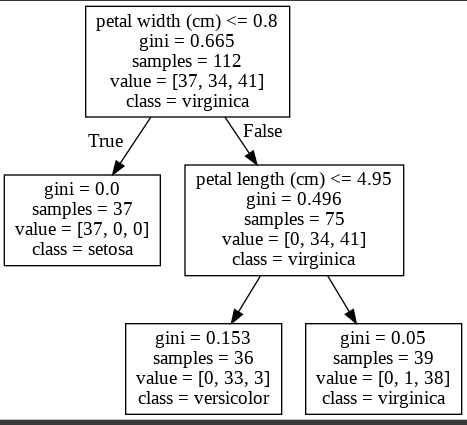

### Caracteristicas mas importantes

In [42]:
#creamos un dataframe de panda (mejora la visualización/administración de los datos)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
3,petal width (cm),0.556
2,petal length (cm),0.444
0,sepal length (cm),0.000
1,sepal width (cm),0.000


## Ejercicio Dataset Flor Iris Mejorado

**Hiper-parametros que ayudan a mejorar la creación de un árbol**

1. max_depth: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
2. min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
3. min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
4. max_leaf_nodes: número máximo de nodos finales

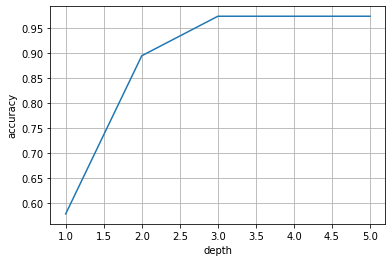

In [43]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, Y_train)
    score = arbol_clasi.score(X_test, Y_test)
    accuracy.append(score)

# Graficamos los resultados 

plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()


De esta manera podemos ver que la version mas optima para la generacion del arbol de decision es de una profundidad de 3

#### Aplicando la profundidad maxima

In [44]:
db_iris = load_iris()

df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names) 
df_iris['target'] = db_iris.target

X_train, X_test, Y_train, Y_test = train_test_split( df_iris[db_iris.feature_names], df_iris['target'], random_state=0 ) 

arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 0)

arbol_clasi.fit(X_train, Y_train)

accuary = arbol_clasi.score(X_test, Y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 97.36842105263158 %


In [45]:
class_names_list=list(['setosa','versicolor','virginica'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

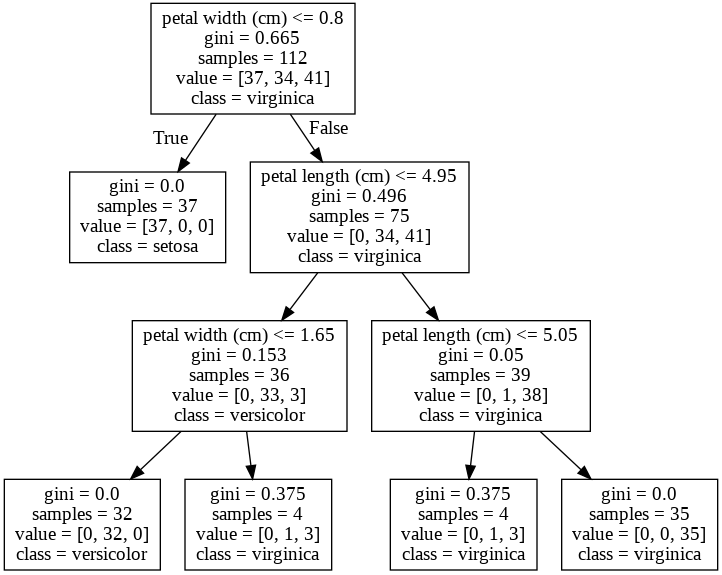